## Welcome Dave to your first real data science and machine learning project.

In the project, you will be tasked to build a machine learning algorithm with the titanic dataset.

We're going to take the following approches
1. problem defination
2. Data
3. Evaluation
4. Featuring
5. Modelling
6. Experimentation


### Dataset discription
 This data set consist of of two csv files
 1. train.csv
 2. test.csv

 each containing 25 colunms to make predictions.
 
 ### Evaluation
 
 The goal of this project is to make it up to top 500 out of over 13,000 participant on kaggle with over or up to  95% accuracy on the test data.
 
 ### features
 
 * survival	Survival	0 = No, 1 = Yes  target
* pclass            	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	               Sex	
* Age	               Age in years	
* sibsp	               number of siblings / spouses aboard the Titanic	
* parch	               number of parents / children aboard the Titanic	
* ticket	           Ticket number	
* fare	               Passenger fare	
* cabin             	Cabin number	
* embarked	           Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 1.  Importing liabaries

Since we will be using sklean, let import all the usefull liabaries

In [1]:
# Loading and manipulation data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Models from sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

## Loading our data

In [2]:
train_df=pd.read_csv('titanic/train.csv')
test_df=pd.read_csv('titanic/test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Let check the lkent of our dataset
len(train_df), len(test_df)

(891, 418)

In [6]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

## Clearning our data

from what we are seeing in our dataset, not all the colums are actually ok for our model preprocessing stage,
columns such as 

1. Name
2. Ticket


In [7]:
train_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
train_df.Cabin.isna().sum(), len(train_df)

(687, 891)

In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# How carbine colunm as a lot of missinf valuse and its not really helping, so let drop it along with the name and ticket
train_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)
test_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
# test_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [13]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [14]:
# For our training data, let move the our target (survival to the last column and start to compare our data)
colomn_to_move= train_df.pop("Survived")

# # Let inseart it back
train_df.insert(8, "Survived", colomn_to_move)


In [15]:
train_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,0
887,888,1,female,19.0,0,0,30.0000,S,1
888,889,3,female,NaN,1,2,23.4500,S,0
889,890,1,male,26.0,0,0,30.0000,C,1


## Comparing our features and labels

### We will start by comparinig the pclass to target

pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd, maybe a pansenger is in first class, second class or thrid class

In [16]:
pd.crosstab(train_df.Pclass, train_df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


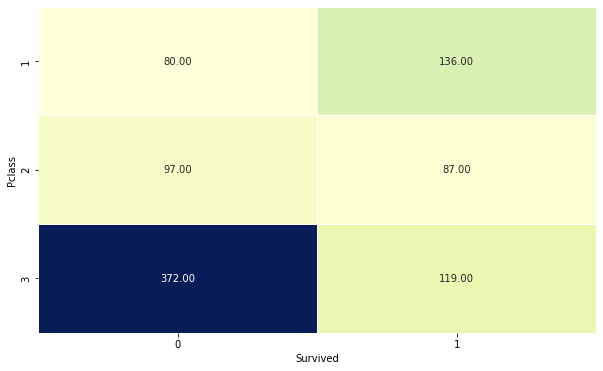

In [17]:
# Let use seaborn heat map to visualized our graph
fig, ax= plt.subplots(figsize=(10, 6))
pretty_graph= pd.crosstab(train_df.Pclass, train_df.Survived)
ax= sns.heatmap(pretty_graph,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap="YlGnBu",
               cbar=False)

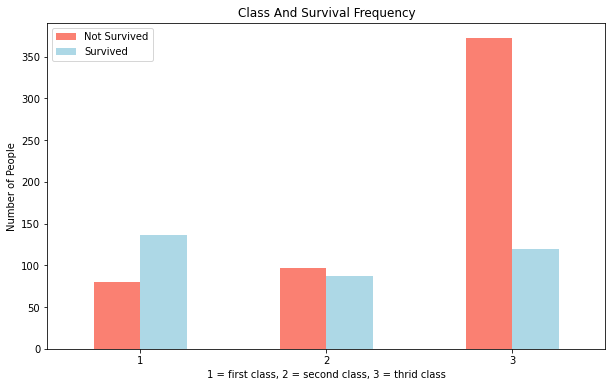

In [18]:
# Let plot more Graph to have more visual
pd.crosstab(train_df.Pclass, train_df.Survived).plot(kind="bar", 
                                                    color=["salmon", "lightblue"],
                                                    figsize= (10, 6))
plt.title("Class And Survival Frequency")
plt.ylabel("Number of People")
plt.xlabel("1 = first class, 2 = second class, 3 = thrid class")
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"]);

From this we can deduce that a lot of people in first class survied the titanic crach than most people in other class, but the ratio of people in second class has a very high survival rate and also lot of people in thrid class did not survive

In [19]:
# Let compare model columns
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [20]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


### Let work with age and survival rate

In [21]:
train_df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [22]:
train_df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

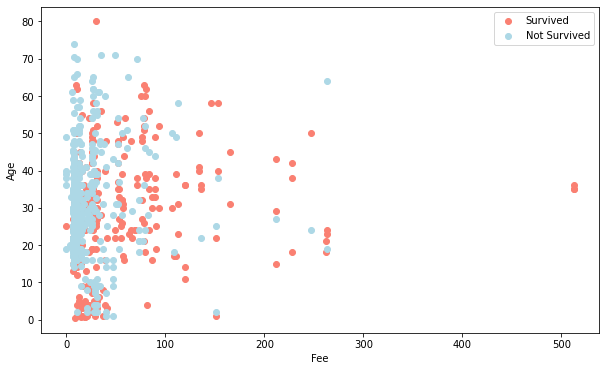

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(
           train_df.Fare[train_df.Survived == 1],
           train_df.Age[train_df.Survived == 1],
           color="salmon")

plt.scatter(train_df.Fare[train_df.Survived == 0],
            train_df.Age[train_df.Survived == 0],
            color="lightblue")

plt.ylabel("Age")
plt.xlabel("Fee")
plt.legend(["Survived", "Not Survived"]);

In [24]:
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


### Let work with Sex and survival rate

but before we do that, we need to onehotecode or labelecoded our data, let see which one is the best 

we can use 

1. pd.getdummies
2. sklearn_label_encoder

But we will be using the sklearn_label_encoder 
to know more about it click here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
# let make a copy of our train df
# But first, let make a copy of our data that we can play with
test= train_df.copy()
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,0
887,888,1,female,19.0,0,0,30.0000,S,1
888,889,3,female,NaN,1,2,23.4500,S,0
889,890,1,male,26.0,0,0,30.0000,C,1


In [27]:
le = LabelEncoder()
# Let fit it to the sex column
le.fit(test.Sex)

LabelEncoder()

In [28]:
# Let return our classes
le.classes_

array(['female', 'male'], dtype=object)

In [29]:
# Let transfor the sex column 
test.Sex = le.transform(test.Sex)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,S,0
887,888,1,0,19.0,0,0,30.0000,S,1
888,889,3,0,NaN,1,2,23.4500,S,0
889,890,1,1,26.0,0,0,30.0000,C,1


In [30]:
# Now let work on it with our real dataset
le= LabelEncoder()
# let fit it
le.fit(train_df.Sex)
# Let transform it
train_df.Sex= le.transform(train_df.Sex)

In [31]:
train_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,S,0
887,888,1,0,19.0,0,0,30.0000,S,1
888,889,3,0,NaN,1,2,23.4500,S,0
889,890,1,1,26.0,0,0,30.0000,C,1


Now,  we can see that our sex colums are now in 0s and 1s, where 

1. `1 = Male`
2. `0 = Female`

Now let now compare Sex to Survival

In [32]:
pd.crosstab(train_df.Sex, train_df.Survived)

Survived,0,1
Sex,,
0,81,233
1,468,109


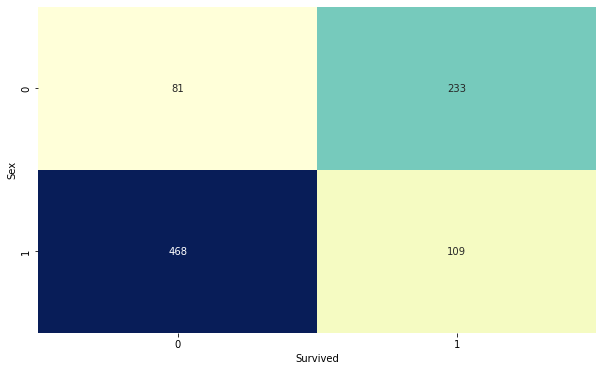

In [33]:
# Let have more visual with the seaborn heatmap

fig, ax= plt.subplots(figsize= (10, 6))

ax= sns.heatmap(pd.crosstab(train_df.Sex, train_df.Survived),
               annot=True,
               cbar=False,
               fmt=".0f",
               cmap="YlGnBu")


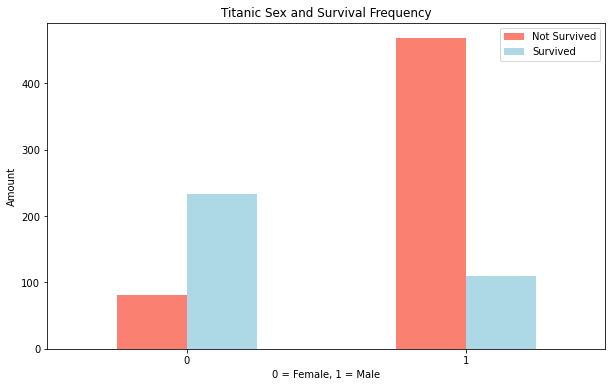

In [34]:
# Let have more visual with bar graph
pd.crosstab(train_df.Sex, train_df.Survived).plot(kind="bar",
                                                 figsize=(10, 6),
                                                 color= ["salmon", "lightblue"])

plt.title("Titanic Sex and Survival Frequency")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"]);

In [35]:
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0


### Let's work with Parch (which rep numbers of family they have on board) and Survival

In [36]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [37]:
pd.crosstab(train_df.Parch, train_df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


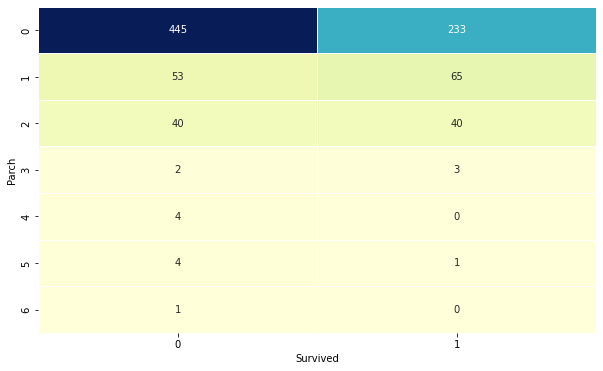

In [38]:
# using sns to have more visual
fig, ax= plt.subplots(figsize= (10, 6))

ax= sns.heatmap(pd.crosstab(train_df.Parch, train_df.Survived),
               annot=True,
               linewidths=0.5,
               cmap="YlGnBu",
               cbar=False,
               fmt=".0f")

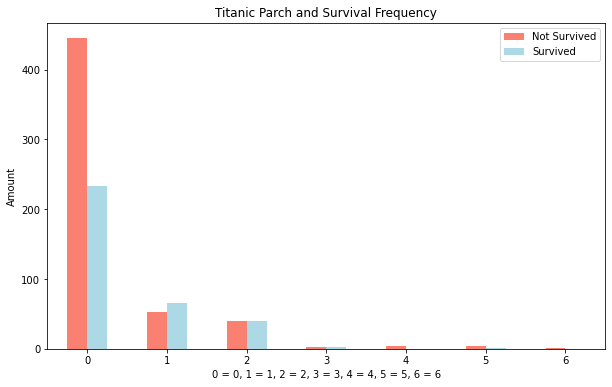

In [39]:
# Let use bar graph 
# Let have more visual with bar graph
pd.crosstab(train_df.Parch, train_df.Survived).plot(kind="bar",
                                                 figsize=(10, 6),
                                                 color= ["salmon", "lightblue"])

plt.title("Titanic Parch and Survival Frequency")
plt.xlabel("0 = 0, 1 = 1, 2 = 2, 3 = 3, 4 = 4, 5 = 5, 6 = 6")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"]);

### Evaluation using correlation

In [40]:
train_df.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,0.042939,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.543351
Age,0.036847,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


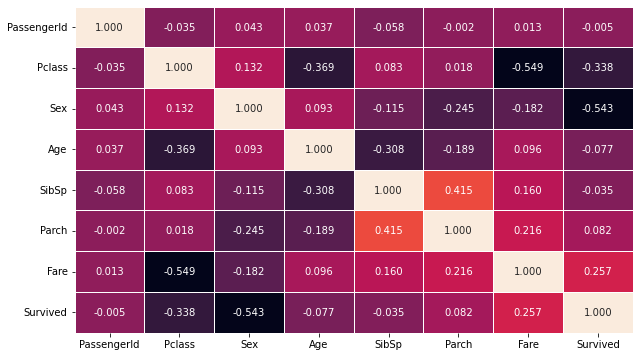

In [41]:
# Let have more visual
corr_max= train_df.corr()

fig, ax= plt.subplots(figsize= (10, 6))

ax= sns.heatmap(corr_max, annot=True,
               linewidths=0.5,
               fmt=".3f",
               cbar=False)

In [42]:
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0


Looking at our data now, there is somthing we forgot to do, well, we forgot to label encode our `Embarked` column, let do that

In [43]:
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0


In [44]:
# Let check for missing data
train_df.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

Looks like we have a lot of missing ages, let fill it with the mean age


In [45]:
# Let create our label encoder
le= LabelEncoder()
# Let fit our lable encoder
le.fit(train_df.Embarked)
# Let tranform the Embacked column
train_df.Embarked=le.transform(train_df.Embarked)

In [46]:
le.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [47]:
train_df["Age"] = train_df.Age.fillna(round(train_df.Age.mean(), 0))

In [48]:
train_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

Looks like we have take care of all our missing data, let split our data into feature and labels



In [49]:
x= train_df.drop(["Survived", "PassengerId"], axis=1)
y= train_df.Survived

In [50]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [51]:
x.shape

(891, 7)

Wow, we have drop our column from 13 that we start with to around 7, wow, lot of data exploration Dave, Nice work

In [52]:
y.head(), len(y)

(0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64,
 891)

In [60]:
# let Now split our data into traning and test set
np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [61]:
len(x_train), len(x_test)

(712, 179)

In [62]:
len(y_train), len(y_test)

(712, 179)

## Modelling

We are up to building a machine learning algorithm, we will be using the

1. RandomForestClassifier
2. GaussianNB
3. LogisticRegression
4. KNeighborsClassifier


In [63]:
# Let set up a dictionary for all our model
models= {"RandomForestClassifier": RandomForestClassifier(),
         "GaussinNB": GaussianNB(),
         "LogisticRegression": LogisticRegression(solver='lbfgs', max_iter=1000),
         "KNeighbors": KNeighborsClassifier()

}

In [64]:
# Let create a funtion to fit and score our model

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    """
    Fit and score machine learning models
    
    Augs:

        models = a dict containing Sklearn classifier models
        x_train = the training data (no label)
        x_test= the test data (no label)
        y_train= train label
        y_test= test label
    
    Returns
        A the score of each model in the dict
    """
    
    # Set random seed 
    np.random.seed(42)
    # Make an emt dict to store our result
    models_scores= {}
    
    # Loop through the model
    for model_name, model in models.items(): 
        # let fit each model
        model.fit(x_train, y_train)
        # Let score each model and add it to our models_scores dict
        models_scores[model_name]= model.score(x_test, y_test)
        
    return models_scores
        

In [65]:
# Let bulid all our model
models_scores= fit_and_score(models,
                             x_train,
                             x_test,
                             y_train,
                             y_test)

In [66]:
# Let view our models scores
models_scores

{'RandomForestClassifier': 0.8156424581005587,
 'GaussinNB': 0.776536312849162,
 'LogisticRegression': 0.8100558659217877,
 'KNeighbors': 0.7150837988826816}

In [67]:
# Let create a pandas dataframe from our models_scores dict
score_df= pd.DataFrame(models_scores, index=["Accuracy"])
score_df

,RandomForestClassifier,GaussinNB,LogisticRegression,KNeighbors
Accuracy,0.815642,0.776536,0.810056,0.715084


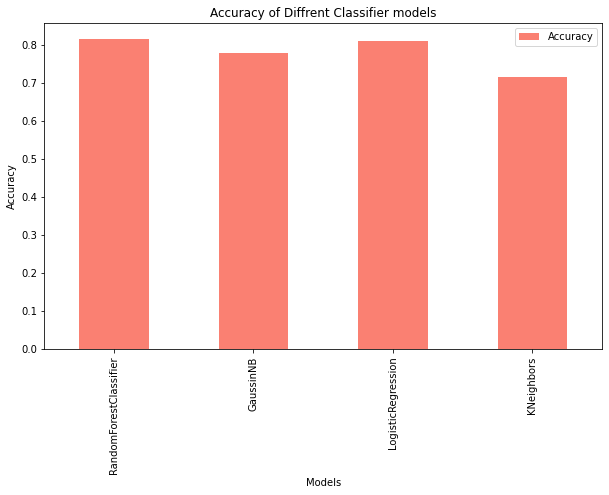

In [68]:
# Let have more visual of our model
score_df.T.plot(kind="bar",
             figsize=(10, 6),
               color="salmon")
plt.title("Accuracy of Diffrent Classifier models")
plt.ylabel("Accuracy")
plt.xlabel("Models");

Well, looking at all our models, we can say `RandomForestClassifier` outperform all other models amd `KNeighbors` performs the list.

well, this is not the best of our models, let try to improve each models excpect from the `KNeighbors`, `KNeighbors` is out

### Hyperparameter Turning

We have seen the best of our models with there default hyperparameter, now let try to turn there hyperparamters

## Let try and improve our GaussinNB first

To know more, check out this link: https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb



In [69]:
# Let set random state
np.random.seed(42)

# Let set a intancy of our classifier
nb_classifier = GaussianNB()

# Let set up our hyperparameter
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

# Creating a RandomizedGridSearch

gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=parameters, 
                 cv=5,   # split our data into five fold 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy', verbose=1)

In [70]:
gs_NB.best_params_

{'var_smoothing': 1e-06}

In [293]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [295]:
learning_curve(gs_NB, x, y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each

(array([ 71, 231, 391, 551, 712]),
 array([[0.8028169 , 0.78873239, 0.78873239, 0.78873239, 0.78873239],
        [0.80519481, 0.7965368 , 0.7965368 , 0.7965368 , 0.7965368 ],
        [0.79539642, 0.78005115, 0.79539642, 0.80818414, 0.80818414],
        [0.80036298, 0.7876588 , 0.79128857, 0.78584392, 0.78584392],
        [0.80758427, 0.79494382, 0.79353933, 0.78370787, 0.79073034]]),
 array([[0.61452514, 0.76966292, 0.80337079, 0.75842697, 0.76404494],
        [0.77653631, 0.79775281, 0.79775281, 0.7752809 , 0.80337079],
        [0.75977654, 0.78651685, 0.79775281, 0.78651685, 0.80337079],
        [0.75418994, 0.79213483, 0.79213483, 0.79213483, 0.80898876],
        [0.75418994, 0.78089888, 0.78651685, 0.79775281, 0.80337079]]))

In [71]:
# Let evaluate our model
gs_NB.score(x_test, y_test)

0.776536312849162

Well, we have try diffrent hyperameters on `GaussianNB()` but we haven't been able to get it to score more than our expetction, let try to turn the hyperparameter of another model



### RandomForestRregressor Hyperparameter

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [73]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [74]:
# Let create an intances of our model
np.random.seed(42)

rf_clf= RandomForestClassifier()

rf_red_reg= RandomizedSearchCV(rf_clf, 
                              param_distributions=random_grid,
                              n_iter=20,
                              scoring="accuracy",
                              cv=20,
                              n_jobs=-1)


# Let fit our model
rf_red_reg.fit(x_train, y_train)
rf_red_reg

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='accuracy')

In [75]:
# Let get the best parameters from our model
rf_red_reg.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [76]:
# wow, took a while for our model to finish training, let evaluate our model
rf_red_reg.score(x_test, y_test)

0.8379888268156425

Good job Dave, you where able to get your model from `81%` to `83%` i would say its a  very nice job, now let see if we can use GridSearchCV to improve our model

let start by reseting our hyperparameter

In [81]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [False]

In [82]:
# Create the grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
rf_clf_grid= RandomForestClassifier()


rf_grid= GridSearchCV(rf_clf_grid,
                     param_grid=grid,
                     scoring="accuracy",
                     verbose=True,
                     cv=5)

# Let fit our grid search model
rf_grid.fit(x_train, y_train)
rf_grid

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 175, 250, 325, 400]},
             scoring='accuracy', verbose=True)

In [84]:
# Let get our best parameters
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 400}

In [85]:
# Let evaluate our model
rf_grid.score(x_test, y_test)

0.8324022346368715

Well, looks like our RandomForestRegessor has tried, it has make it up to 83%, let use randomizedSearchCV for our 
LogisticRegression model

### LogisticRegression Hyperparameter Tuning

logisticRegression has two hyperparameters that we can tune

1. C 
2. penalty 

In [87]:
# Let set uo our parameter
rg_log_re= {"C": np.logspace(-4, 4, 50),
            "penalty": ['l1', 'l2']}

In [92]:
# Let set random seed
np.random.seed(42)

# Let set up our model instant
model= LogisticRegression(solver='lbfgs', max_iter=1000)

rs_log_reg= RandomizedSearchCV(model,
                              param_distributions=rg_log_re,
                              n_iter=5,
                              cv=5,
                              verbose=True,
                              scoring="accuracy")

# Let fit our model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/olowu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/olowu/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/olowu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/olowu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    rai

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=True)

In [93]:
# Let obtain our best parameter
rs_log_reg.best_params_

{'penalty': 'l2', 'C': 494.1713361323828}

In [94]:
# Let score our model
rs_log_reg.score(x_test, y_test)

0.8100558659217877

Well, so far, looks like our RandomForestClassifier has been the best model, let futher evaluate our model

## Evaluting our tuned machine learning classifier, beyound accuracy

* ROC curve and AUC score
* Confusion matrix
* Clasification Report
* Precision
* Recall
* F1-score

... and it would be great if cross-valiudation was used where possible.

To make comparism and evaluating our trained model, first we need to make prediction

In [96]:
# Let load back our model
rf_grid.score(x_test, y_test)

0.8324022346368715

In [102]:
# Let make predictions with our model
y_preds= rf_grid.predict(x_test)
y_preds[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1])

### ROC curve and AUC plot

/home/olowu/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


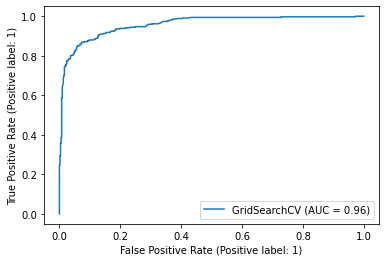

In [103]:
plot_roc_curve(rf_grid,
              x,
               y)

In [104]:
from sklearn.metrics import RocCurveDisplay

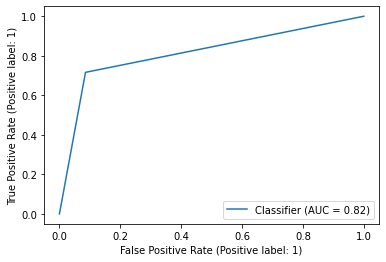

In [108]:
RocCurveDisplay.from_predictions(y_test, y_preds);

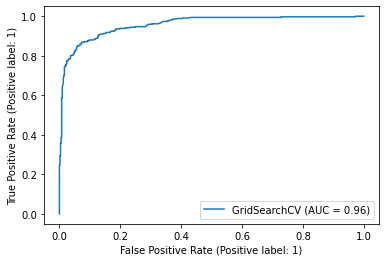

In [107]:
RocCurveDisplay.from_estimator(rf_grid,
                              x,
                              y);

### Confusion Matrix

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [111]:
conf_max= confusion_matrix(y_test, y_preds)
conf_max

array([[96,  9],
       [21, 53]])

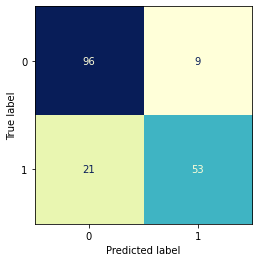

In [114]:
# Let give our conf_max more visual
ConfusionMatrixDisplay.from_predictions(y_test, y_preds,
                                       colorbar=False,
                                       cmap="YlGnBu");

### Classification Report

In [115]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of oue model using cross-validation and to do that we'll be using `cross-val_score`

In [116]:
# Let look at our best parameters
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 400}

In [123]:
# Let create a new instance of our model
clf= RandomForestClassifier(bootstrap= False,
                             max_depth= 10,
                             max_features= 'sqrt',
                             min_samples_leaf= 2,
                             min_samples_split= 5,
                             n_estimators= 550)

# Let fit and score our model
clf.fit(x_train, y_train)
# Let score our model
clf.score(x_test, y_test)

0.8324022346368715

In [129]:
# Let now use cross validation score

# Let set random seed
np.random.seed(42)


cv_acc= cross_val_score(clf,
                       x,
                       y,
                       scoring="accuracy",
                       cv=5)

print(cv_acc)

print(f"\nThe mean of our cross validation accuracy: {np.mean(cv_acc)*100 :.2f}% ")

[0.79329609 0.80337079 0.87078652 0.80898876 0.85393258]

The mean of our cross validation accuracy: 82.61% 


In [130]:
# Let now use cross validation score

# Let set random seed
np.random.seed(42)


cv_precision= cross_val_score(clf,
                       x,
                       y,
                       scoring="precision",
                       cv=5)

print(cv_precision)

print(f"\nThe mean of our cross validation precision: {np.mean(cv_precision)*100 :.2f}% ")

[0.73529412 0.76190476 0.89473684 0.84       0.82089552]

The mean of our cross validation precision: 81.06% 


In [131]:
# Let set random seed
np.random.seed(42)


cv_recall= cross_val_score(clf,
                       x,
                       y,
                       scoring="recall",
                       cv=5)

print(cv_recall)

print(f"\nThe mean of our cross validation recall: {np.mean(cv_recall)*100 :.2f}% ")

[0.72463768 0.70588235 0.75       0.61764706 0.79710145]

The mean of our cross validation recall: 71.91% 


In [132]:
# Let set random seed
np.random.seed(42)


cv_f1_score= cross_val_score(clf,
                       x,
                       y,
                       scoring="f1",
                       cv=5)

print(cv_f1_score)

print(f"\nThe mean of our cross validation f1_score: {np.mean(cv_f1_score)*100 :.2f}% ")

[0.72992701 0.73282443 0.816      0.71186441 0.80882353]

The mean of our cross validation f1_score: 75.99% 


In [133]:
# Let create a dict for all our cross validation metrix and plot it

cv_metrics= {
    "Accuracy": np.mean(cv_acc),
    "Precision": np.mean(cv_precision),
    "Recall": np.mean(cv_recall),
    "f1_score": np.mean(cv_f1_score)
}

In [134]:
cv_metrics

{'Accuracy': 0.8260749482141737,
 'Precision': 0.8105662488090287,
 'Recall': 0.7190537084398977,
 'f1_score': 0.7598878741943222}

In [144]:
# Let't convert in to an pandas dataframe
cv_metrics_df= pd.DataFrame(cv_metrics, index=["score"])
cv_metrics_df

,Accuracy,Precision,Recall,f1_score
score,0.826075,0.810566,0.719054,0.759888


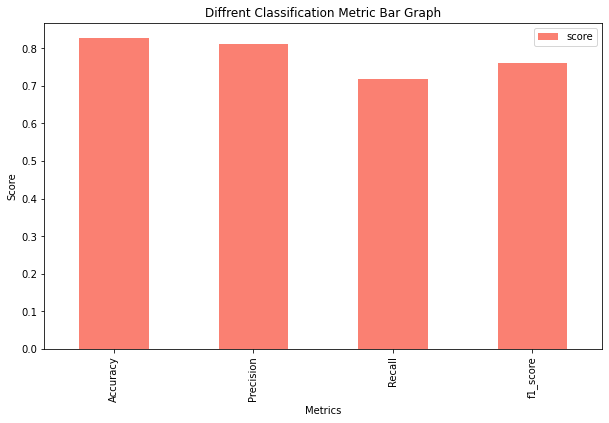

In [147]:
# Let now plot our it on a bar graph
cv_metrics_df.T.plot(kind="bar",
                    figsize= (10, 6),
                    color="salmon")

plt.title("Diffrent Classification Metric Bar Graph")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.legend()

# Let save our graph
plt.savefig("plots/Classification Graph.png")

## Features Impotance

In [149]:
# Let create a new instance of our model
clf1= RandomForestClassifier(bootstrap= False,
                             max_depth= 10,
                             max_features= 'sqrt',
                             min_samples_leaf= 2,
                             min_samples_split= 5,
                             n_estimators= 550)

# Let fit and score our model
clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=550)

In [151]:
# Let check the coef_
feature_importance=clf1.feature_importances_
feature_importance

array([0.12000947, 0.41125242, 0.15186216, 0.04802389, 0.03387261,
       0.20398108, 0.03099836])

In [160]:
# Match coef's of features to columns
feature_dict = dict(zip(train_df.columns, list(clf1.feature_importances_)))
feature_dict

{'PassengerId': 0.12000947156702933,
 'Pclass': 0.4112524241565916,
 'Sex': 0.15186215782175036,
 'Age': 0.04802389101736079,
 'SibSp': 0.03387261207223143,
 'Parch': 0.20398108371075724,
 'Fare': 0.030998359654279065}

In [165]:
# Let put our Feature dict into a pandas df
feature_dict_df= pd.DataFrame(feature_dict, index=["correlation"])
feature_dict_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
correlation,0.120009,0.411252,0.151862,0.048024,0.033873,0.203981,0.030998


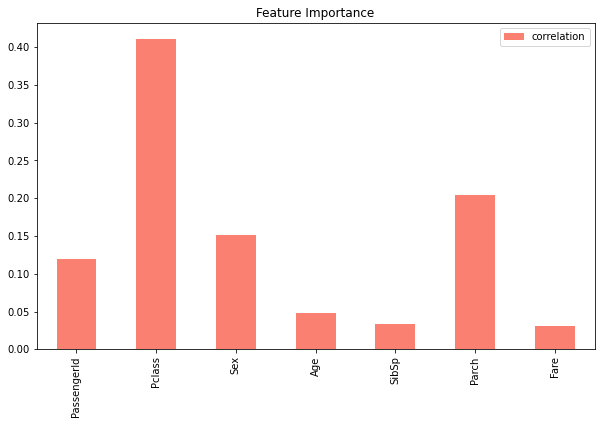

In [172]:
feature_dict_df.T.plot(kind="bar",
                      color= "salmon",
                      figsize= (10, 6) )

plt.title('Feature Importance')

# Let save our plot
plt.savefig("plots/feature importance.png");

In [173]:
# Let submit our predictions
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [175]:
# Let create our label encoder
le= LabelEncoder()
# Let fit our lable encoder
le.fit(test_df.Embarked)
# Let tranform the Embacked column
test_df.Embarked=le.transform(test_df.Embarked)

In [176]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,1
1,893,3,female,47.0,1,0,7.0000,2
2,894,2,male,62.0,0,0,9.6875,1
3,895,3,male,27.0,0,0,8.6625,2
4,896,3,female,22.0,1,1,12.2875,2


In [177]:
# Let create our label encoder
le= LabelEncoder()
# Let fit our lable encoder
le.fit(test_df.Sex)
# Let tranform the Embacked column
test_df.Sex=le.transform(test_df.Sex)

In [178]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [180]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [181]:
# Let fiil the missing age value
test_df["Age"] = test_df.Age.fillna(round(test_df.Age.mean(), 0))
test_df["Fare"] = test_df.Fare.fillna(round(test_df.Fare.mean(), 4))

In [182]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [184]:
# Let drop Passager ID column
PassengerId = test_df.PassengerId
PassengerId  

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [185]:
test_df= test_df.drop("PassengerId", axis=1)

In [186]:
# Let make prediction on our test data
test_preds= clf.predict(test_df)
test_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [197]:
# Let create our sunmission dict
submission_dict= {"PassengerId ": PassengerId,
                 "Survived": test_preds}

In [198]:
submission_dict

{'PassengerId ': 0       892
 1       893
 2       894
 3       895
 4       896
        ... 
 413    1305
 414    1306
 415    1307
 416    1308
 417    1309
 Name: PassengerId, Length: 418, dtype: int64,
 'Survived': array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1

In [199]:
# Let convert our submision dict to a pandas dataframe
submission= pd.DataFrame(submission_dict)

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [196]:
# Let export our submission csv

submission.to_csv("Submission_1.csv", index=False)

In [201]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': test_preds})
output.to_csv('submission_2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
